# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warning.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Define path
path = r'C:\Users\muham\OneDrive\Desktop\careerfoundry\Data Immersion\Achievement 6\05-10-25 Accident_data_germany_2024_analysis'

In [3]:
# Import Data
df_merged_new = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_new.csv'), low_memory= False)

In [38]:
df_merged_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268519 entries, 0 to 268518
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0.2                   268519 non-null  int64  
 1   Unnamed: 0.1                   268519 non-null  int64  
 2   Unnamed: 0                     268519 non-null  int64  
 3   OID_                           268519 non-null  int64  
 4   accident_id                    268519 non-null  object 
 5   state                          268519 non-null  int64  
 6   administrative_region          268519 non-null  int64  
 7   administrative_district        268519 non-null  int64  
 8   municipality                   268519 non-null  int64  
 9   year_of_accident               268519 non-null  int64  
 10  month_of_accident              268519 non-null  int64  
 11  hour_of_accident               268519 non-null  int64  
 12  day_of_week                   

In [39]:
df_merged_new = df_merged_new.drop(columns=['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0'])


In [4]:
# creating subset
df_state = df_merged_new[df_merged_new['state_name'] == 'Nordrhein-Westfalen'].copy()

In [41]:
df_state.head()

,OID_,accident_id,state,administrative_region,administrative_district,municipality,year_of_accident,month_of_accident,hour_of_accident,day_of_week,...,UTM_Y,Longitude_WGS84,Latitude_WGS84,location_check_level,state_name,population,accidents_in_state,accidents_per_100k,light_condition_label,road_condition_label
22375,22376,05240106506100558976,5,1,16,0,2024,1,17,7,...,5.673195e+06,6.408424,51.181443,1,Nordrhein-Westfalen,17900000,59035,329.804469,twilight,Wet/damp/slippery
22376,22377,05240106502340556094,5,1,13,0,2024,1,15,7,...,5.710558e+06,7.010926,51.529254,1,Nordrhein-Westfalen,17900000,59035,329.804469,daylight,Wet/damp/slippery
22377,22378,05240106502340550432,5,1,13,0,2024,1,9,7,...,5.709652e+06,7.007831,51.521057,1,Nordrhein-Westfalen,17900000,59035,329.804469,daylight,Wet/damp/slippery
22378,22379,05240106502135558500,5,1,13,0,2024,1,16,7,...,5.702653e+06,7.074324,51.459219,1,Nordrhein-Westfalen,17900000,59035,329.804469,darkness,Wet/damp/slippery
22379,22380,05240106501314560452,5,1,12,0,2024,1,20,7,...,5.700235e+06,6.780798,51.432291,1,Nordrhein-Westfalen,17900000,59035,329.804469,darkness,Wet/damp/slippery


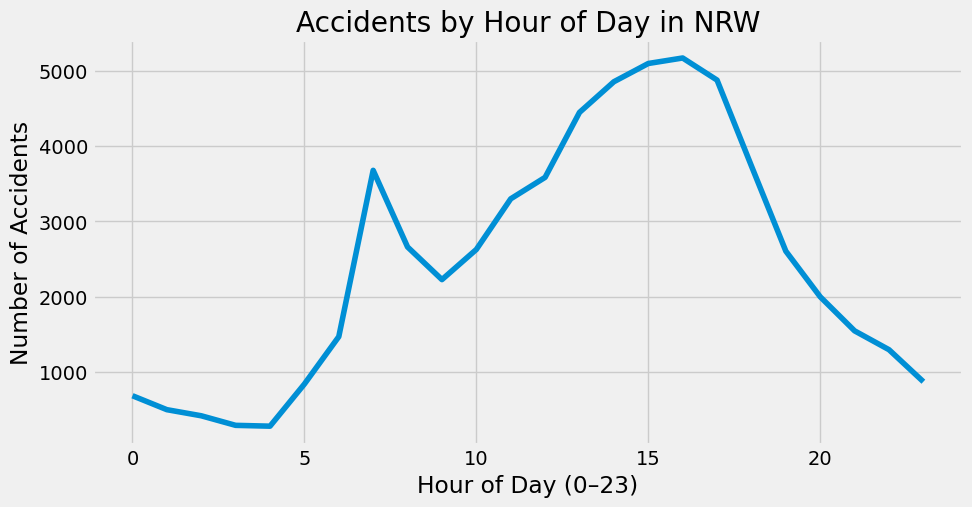

In [5]:
# Accidents by hour of day

hourly_counts = df_state.groupby('hour_of_accident').size()

plt.figure(figsize=(10,5))
hourly_counts.plot(kind='line')
plt.title("Accidents by Hour of Day in NRW")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Accidents")
plt.savefig("NRW_Accident_Hour.png", dpi=300, bbox_inches='tight')
plt.show()


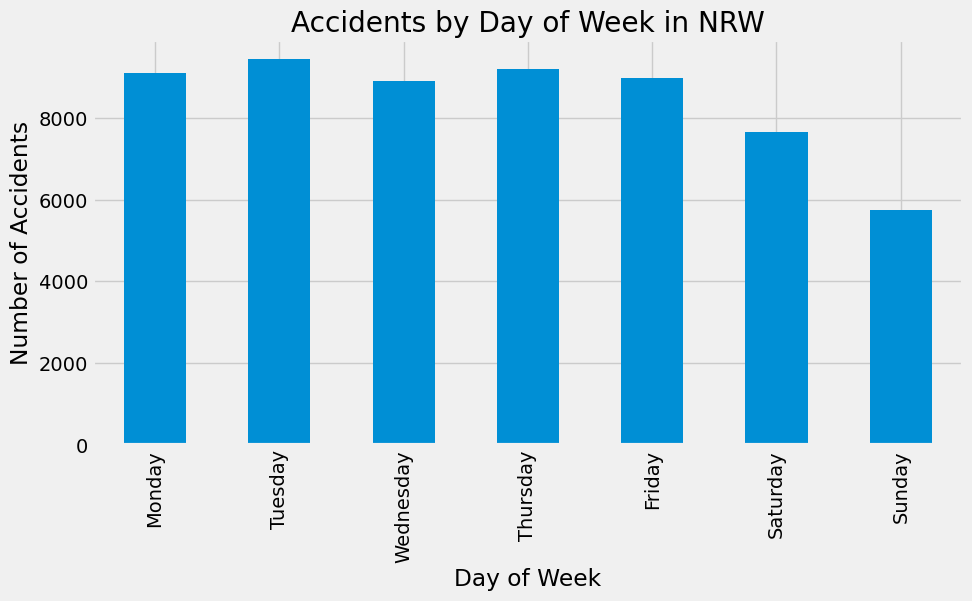

In [6]:
# Accidents by day of week
day_map = {1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday'}
df_state['day_name'] = df_state['day_of_week'].map(day_map)

weekday_counts = df_state.groupby('day_name').size().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(10,5))
weekday_counts.plot(kind='bar')
plt.title("Accidents by Day of Week in NRW")
plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")
plt.savefig("NRW_Accident_Day.png", dpi=300, bbox_inches='tight')
plt.show()


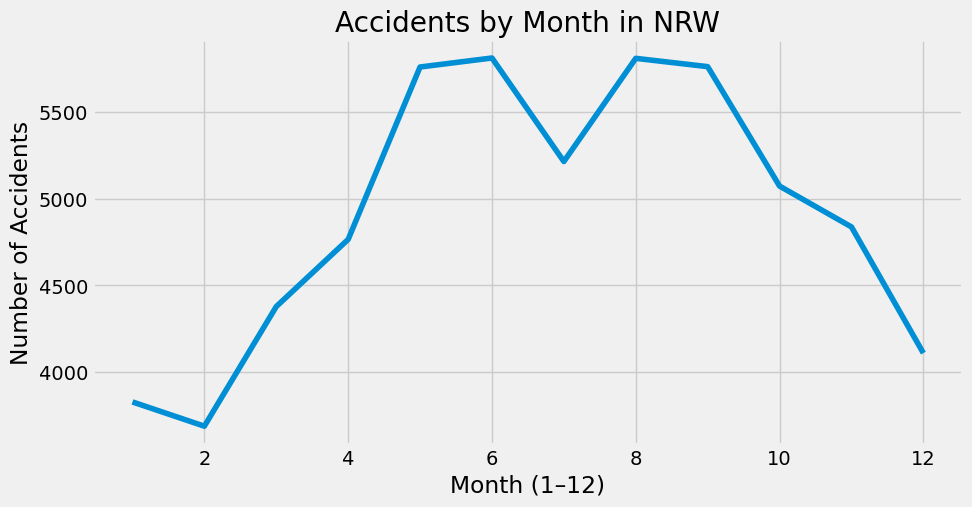

In [7]:
# Accidents by month of year
monthly_counts = df_state.groupby('month_of_accident').size()

plt.figure(figsize=(10,5))
monthly_counts.plot(kind='line')
plt.title("Accidents by Month in NRW")
plt.xlabel("Month (1–12)")
plt.ylabel("Number of Accidents")
plt.savefig("NRW_Accident_Month.png", dpi=300, bbox_inches='tight')
plt.show()

The dataset records each accident as an individual row and includes variables for year, month, hour, and day of week. However, it does not contain the calendar day of month (1–31), which makes it impossible to construct a continuous timestamp required for daily or chronological time-series decomposition.
Because of this, I analyzed cyclical temporal patterns rather than trends over calendar dates. This approach is appropriate for accident frequency data, as many risk factors follow recurring time-based cycles (e.g., rush hours, weekday vs. weekend travel patterns, and seasonal effects).
I selected only accidents occurring in Nordrhein-Westfalen to focus on a single, large, densely populated region. Then, I examined accident counts by hour of day, day of week, and month of year to understand short-, medium-, and long-term periodic patterns in accident behavior.

##### Generating hourly time series data frame

In [29]:
df_state['timestamp'] = pd.to_datetime(
    df_state['year_of_accident'].astype(str) + '-' +
    df_state['month_of_accident'].astype(str) + '-01 ' +
    df_state['hour_of_accident'].astype(str) + ':00'
)


In [30]:
# create hourly time series
hourly = df_state.resample('H', on='timestamp').size().to_frame(name='accidents')

hourly = hourly.reset_index().rename(columns={'timestamp':'Date'})
hourly = hourly.set_index('Date')
hourly.head()


,accidents
Date,
2024-01-01 00:00:00,40
2024-01-01 01:00:00,27
2024-01-01 02:00:00,38
2024-01-01 03:00:00,18
2024-01-01 04:00:00,25


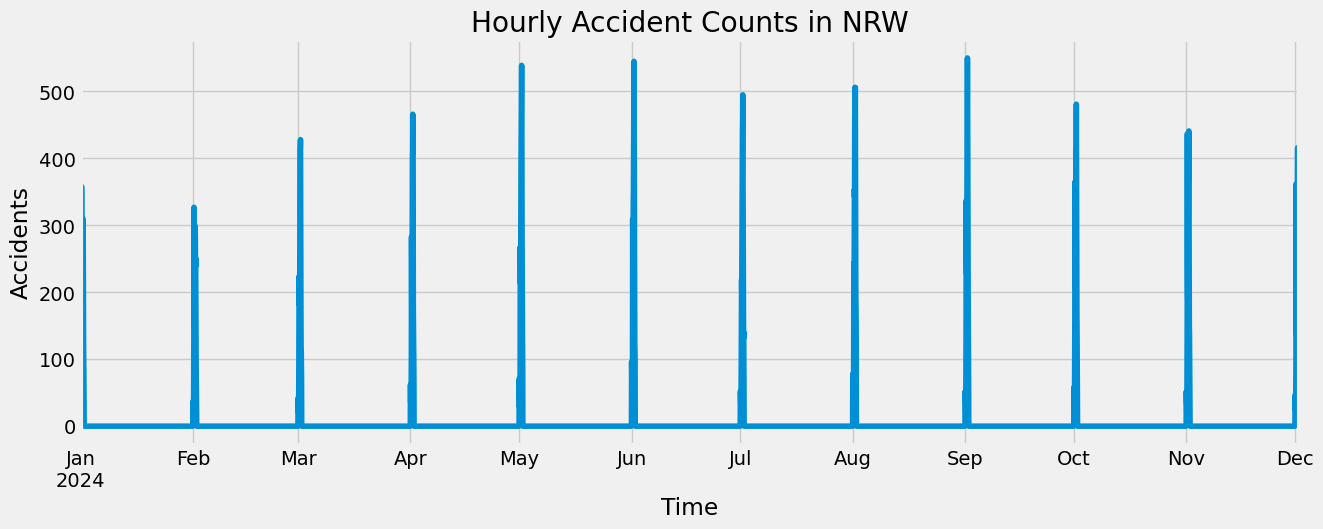

In [33]:
# Plot hourly accident pattern
plt.figure(figsize=(14,5))
hourly['accidents'].plot(kind = 'line')
plt.title("Hourly Accident Counts in NRW")
plt.ylabel("Accidents")
plt.xlabel("Time")
plt.show()


The hourly dataset generated through resampling does not represent a chronological time series because the day component of the timestamp was artificially fixed. Therefore, it reflects an intraday pattern rather than actual time-ordered observations. As a result, it is valid for descriptive pattern analysis but not for decomposition or forecasting.


##### Now switching to monthly time series, because we have valid month variable which gives us a chronological order required for time-series.

In [9]:
# create monthly time series

# Create a proper "YYYY-MM" datetime
df_state['month_date'] = pd.to_datetime(
    df_state['year_of_accident'].astype(str) + '-' +
    df_state['month_of_accident'].astype(str) + '-01' # So here putting -01 as day is not fake but a standard way to represent a calendar month as a timestamp.
)

# Monthly accident counts
monthly = df_state.groupby('month_date').size().to_frame(name='accidents')

monthly.index = pd.to_datetime(monthly.index)

monthly.head()


,accidents
month_date,
2024-01-01,3826
2024-02-01,3686
2024-03-01,4377
2024-04-01,4765
2024-05-01,5761


In [71]:
monthly.index

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', name='month_date', freq=None)

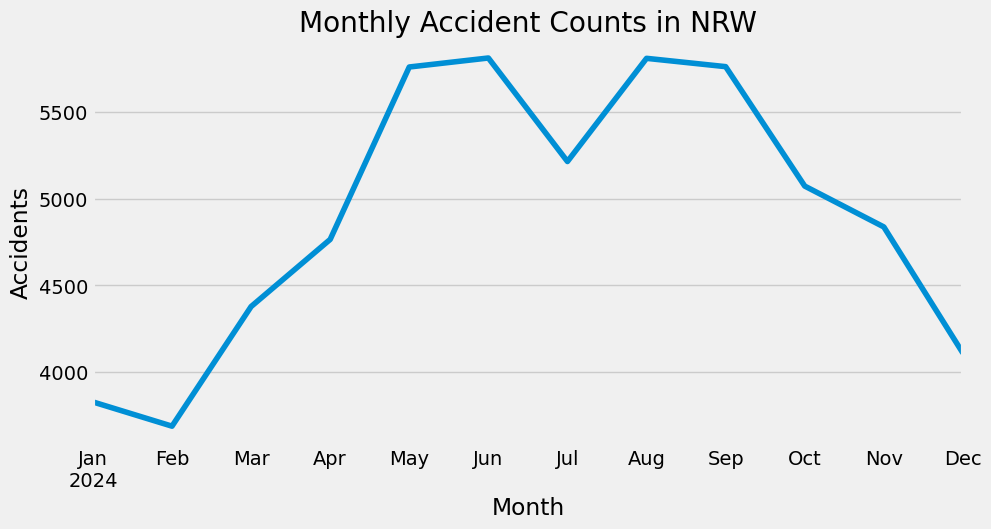

In [10]:
monthly.plot(figsize=(10,5), legend=False)
plt.title("Monthly Accident Counts in NRW")
plt.ylabel("Accidents")
plt.xlabel("Month")
plt.savefig("NRW_Accident_Monthly_count.png", dpi=300, bbox_inches='tight')
plt.show()


In [44]:
# Check for missing values (you shouldn't have any)

monthly.isnull().sum() 

accidents    0
dtype: int64

In [45]:
# Check for duplicates

dups = monthly.duplicated()
dups.sum()

# No dups!

np.int64(0)

###  Time-series analysis: decomposition

In [46]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(monthly, model='additive')

ValueError: x must have 2 complete cycles requires 24 observations. x only has 12 observation(s)

Seasonal decomposition could not be performed because the monthly time series contains only 12 observations (January–December 2024). Decomposition requires at least two full seasonal cycles to reliably separate trend, seasonal, and residual components. Since one seasonal cycle for this dataset is 12 months, a minimum of 24 months of data would be needed. Therefore, decomposition is not appropriate for this dataset with only one year of observations.


### Testing for stationarity

In [50]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(monthly['accidents'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.484954
p-value                        0.540941
Number of Lags Used            3.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


With a p-value of 0.5 and the test statistic = (-1.4) larger than the critical value(5%) = -3.36, we can not reject our null hypothesis of "presence of unit root" or in simple words"our data is non-stationary".

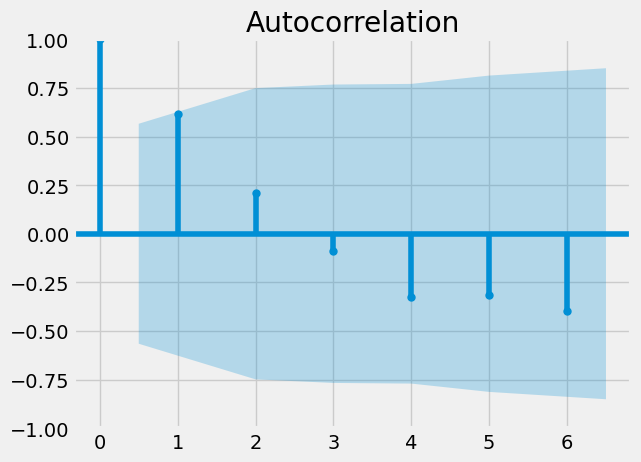

In [51]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(monthly)
plt.show()

### 5. Stationarizing the Unfallatlas 2024 Data

In [52]:
data_diff = monthly - monthly.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [53]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [55]:
data_diff.head()

,accidents
month_date,
2024-02-01,-140.0
2024-03-01,691.0
2024-04-01,388.0
2024-05-01,996.0
2024-06-01,52.0


In [56]:
data_diff.columns

Index(['accidents'], dtype='object')

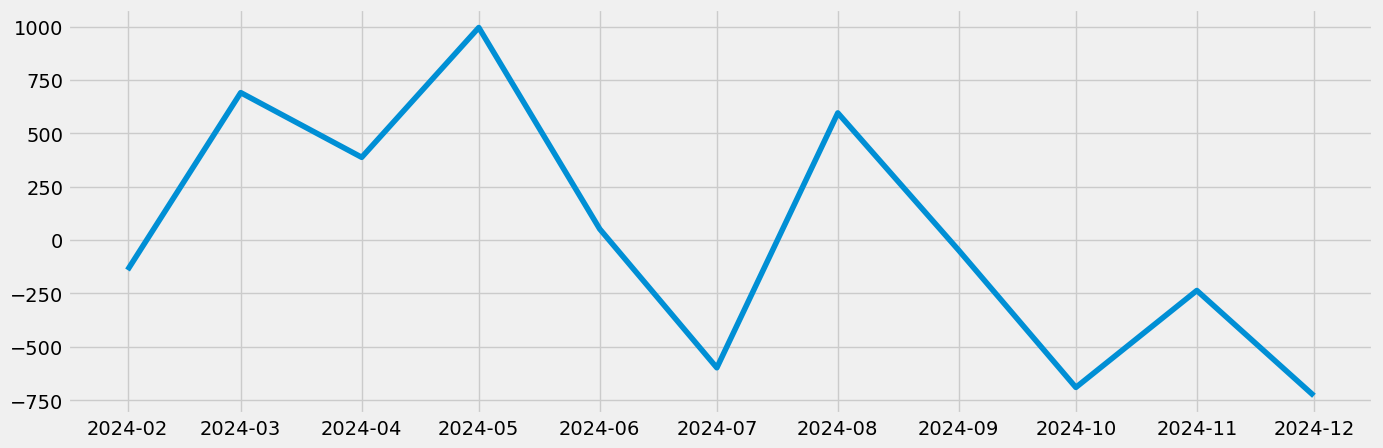

In [57]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [58]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -0.218255
p-value                        0.936310
Number of Lags Used            2.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


After perforimg the first round of differencing we are still unable to reject our null hypothesis test statistic = -0.21> critical value(5%) = -3.36.

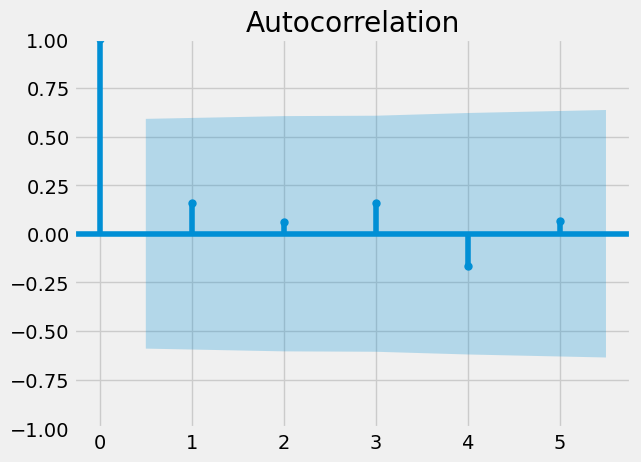

In [59]:
plot_acf(data_diff)
plt.show()

##### second round of differencing to make data stationary

In [60]:
data_diff_2 = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [61]:
data_diff_2.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [62]:
data_diff_2.head()

,accidents
month_date,
2024-03-01,831.0
2024-04-01,-303.0
2024-05-01,608.0
2024-06-01,-944.0
2024-07-01,-650.0


In [63]:
data_diff_2.columns

Index(['accidents'], dtype='object')

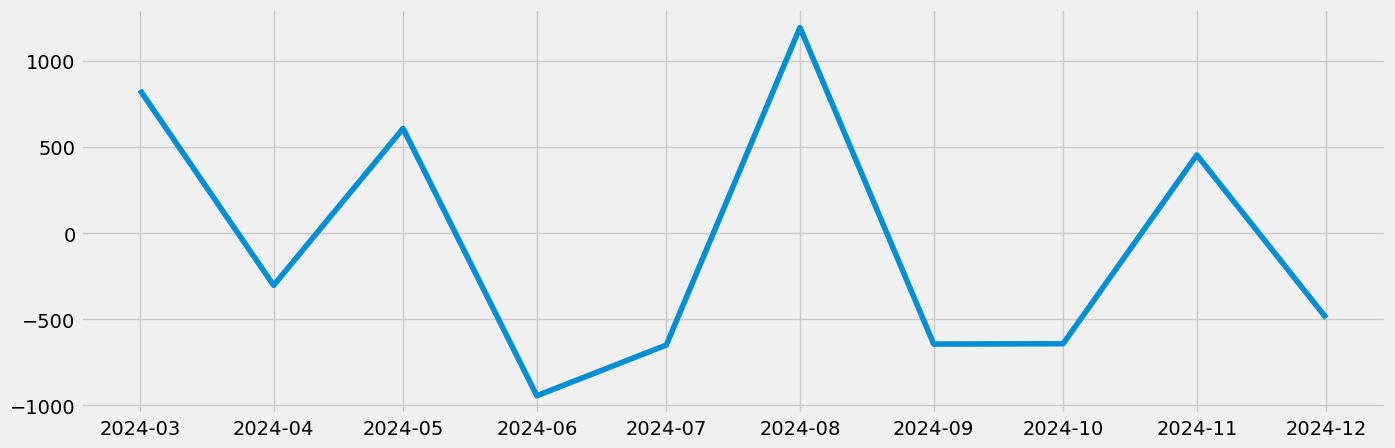

In [64]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [65]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -8.625080e+00
p-value                        5.960502e-14
Number of Lags Used            3.000000e+00
Number of Observations Used    6.000000e+00
Critical Value (1%)           -5.354256e+00
Critical Value (5%)           -3.646238e+00
Critical Value (10%)          -2.901198e+00
dtype: float64


Now with a p-value of 5.9e-14 much smaller than 0.05 and test statistic = -8.62 < critical value(5%) = -3.64, we can rejact our null hypothesis and conclude that our data is now stationary.

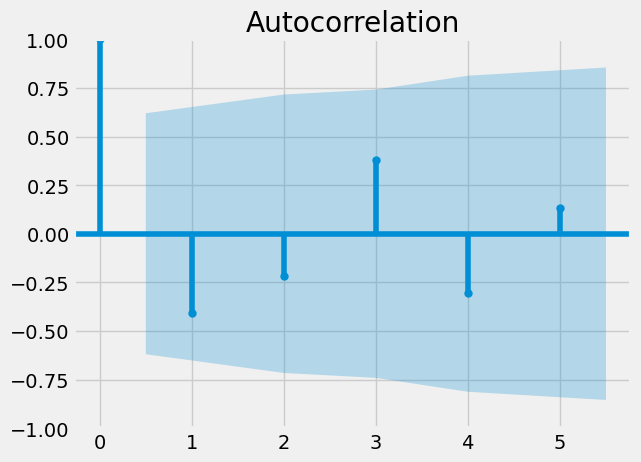

In [66]:
plot_acf(data_diff_2)
plt.show()

Although the ACF plots before and after differencing appear visually similar, the key statistical evidence comes from the Augmented Dickey-Fuller test. The original series displayed a slowly decaying ACF and a high p-value (0.54), indicating that the series was non-stationary. After second differencing, the ADF test returned a very small p-value (5.9e-14), allowing us to reject the null hypothesis and conclude that the differenced series is stationary. The reason the ACF plot does not show a dramatic visual change is that the dataset contains only 12 monthly observations; after differencing twice, very few data points remain, which limits the interpretability of the ACF plot. With a longer time series, the shift from non-stationary to stationary would appear more clearly in the ACF.
